In [80]:
import pandas as pd 
import numpy as np
import mlflow
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [81]:
data = pd.read_csv('power_plants.csv')

In [82]:
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
47835,15.12,48.92,1011.80,72.93,462.59
47836,33.41,77.95,1010.30,59.72,432.90
47837,15.99,43.34,1014.20,78.66,465.96
47838,17.65,59.87,1018.58,94.65,450.93


In [83]:
data['device_id'] = np.random.randint(0, 4, data.shape[0])

/home/arun/Documents/mlwebapp/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
data

,AT,V,AP,RH,PE,device_id
0,14.96,41.76,1024.07,73.17,463.26,2
1,25.18,62.96,1020.04,59.08,444.37,2
2,5.11,39.40,1012.16,92.14,488.56,0
3,20.86,57.32,1010.24,76.64,446.48,2
4,10.82,37.50,1009.23,96.62,473.90,1
...,...,...,...,...,...,...
47835,15.12,48.92,1011.80,72.93,462.59,3
47836,33.41,77.95,1010.30,59.72,432.90,1
47837,15.99,43.34,1014.20,78.66,465.96,3
47838,17.65,59.87,1018.58,94.65,450.93,2


In [85]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split


/home/arun/Documents/mlwebapp/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
mlflow.set_experiment('testing')

In [98]:
def train(df):
    
    dev = df['device_id'].values[0]
    with mlflow.start_run(run_name=f'{dev}', nested=True):
        
        
        
        X = df.drop('PE',axis=1)
        y = df['PE']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                        random_state=1)

        # create linear regression object
        reg = linear_model.LinearRegression()

        # train the model using the training sets
        reg.fit(X_train, y_train)

        score = reg.score(X_test, y_test)
        print('score', score)
        
        mlflow.log_metric("rmse", score)
    return score
    

    
    

In [94]:
# train(data)

In [99]:
df0 = data[data['device_id'] == 0]
df1 = data[data['device_id'] == 1]
df2 = data[data['device_id'] == 2]
df3 = data[data['device_id'] == 3]

listdf = [df0, df1, df2, df3]

In [100]:
with mlflow.start_run(run_name='grouped'):
    for i in listdf:
        train(i)

score 0.9309745089174899
score 0.9270064380152604
score 0.9313309116110358
score 0.9297131204590209


/home/arun/Documents/mlwebapp/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
 mlflow.end_run()

/home/arun/Documents/mlwebapp/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
data.groupby('device_id').apply(train)

KeyError: 'device_id'

In [92]:
data

,AT,V,AP,RH,PE,device_id
0,14.96,41.76,1024.07,73.17,463.26,2
1,25.18,62.96,1020.04,59.08,444.37,2
2,5.11,39.40,1012.16,92.14,488.56,0
3,20.86,57.32,1010.24,76.64,446.48,2
4,10.82,37.50,1009.23,96.62,473.90,1
...,...,...,...,...,...,...
47835,15.12,48.92,1011.80,72.93,462.59,3
47836,33.41,77.95,1010.30,59.72,432.90,1
47837,15.99,43.34,1014.20,78.66,465.96,3
47838,17.65,59.87,1018.58,94.65,450.93,2


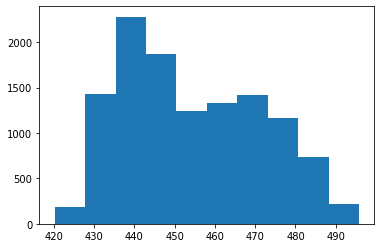

In [15]:
import matplotlib.pyplot as plt

plt.hist(df0['PE'])
plt.show()

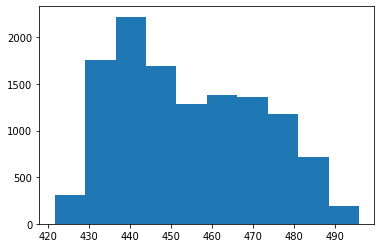

In [16]:
plt.hist(df1['PE'])
plt.show()

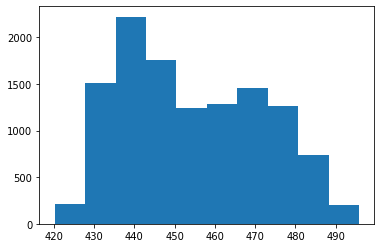

In [17]:
plt.hist(df2['PE'])
plt.show()

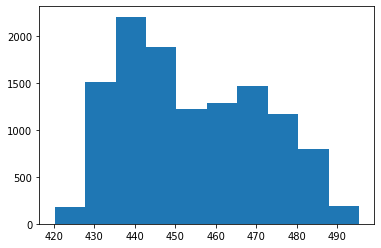

In [18]:
plt.hist(df3['PE'])
plt.show()

In [20]:
df0_new = df0.sort_values('PE')

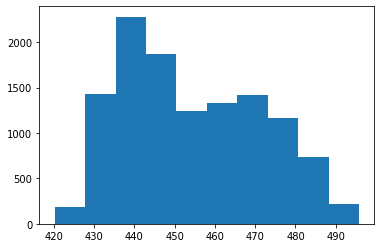

In [21]:
plt.hist(df0_new['PE'])
plt.show()

In [22]:
import mlflow


In [67]:
df0['device_id'].values[0]

0

In [ ]:
0